# Convolution (Signal & Image)

## References
- https://en.wikipedia.org/wiki/Convolution
- https://www.youtube.com/watch?v=KuXjwB4LzSA (3 blue 1 brown)

## Basics

* In mathematics (in particular, functional analysis), convolution is a mathematical operation on two functions (f and g) that produces a third function ${\displaystyle f*g}$ that expresses how the shape of one is modified by the other.
* The term convolution refers to both the result function and the process of computing it. It is defined as the integral of the product of the two functions after one is reversed and shifted. The integral is evaluated for all values of shift, producing the convolution function.
* The convolution of f and g is written f*g, defined as integral of product of the two functions after one is reflected about he y-axis and shifted
\begin{align}
(f * g)(t) &:= \int_{-\infty}^\infty f(\tau) g(t - x) \, dx \\
& \text{ Or }\\
(f * g)(t) &:= \int_{-\infty}^\infty f(t-x) g(x)\, dx
\end{align}

Looking at it differently as
\begin{align}
(a * b)_n = \sum_{i,j \ \forall i+j = n} a_i . b_j \\
\text{or} \\
(a * b)_n = \sum_{i = 1}^{N} a_i . b_{N - i}
\end{align}

<!-- 
\begin{align}
g(x,y) = \omega *f(x,y) &= \sum_{dx=-a}^a{\sum_{dy=-b}^b{ \omega (dx,dy)f(x+dx,y+dy)}}
\end{align} -->

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [2]:
x = np.array([1, 2, 3])
kernel = np.array([4, 5, 6])

### numpy convolve

In [3]:
np.convolve(x, kernel)

array([ 4, 13, 28, 27, 18])

### sliding window

```
|_6_|_5_|_4_|
        | 1 | 2 | 3 |           = 4 * 1 = 4

    |_6_|_5_|_4_|
        | 1 | 2 | 3 |           = 5 * 1 + 4 * 2 = 13

        |_6_|_5_|_4_|
        | 1 | 2 | 3 |           = 6 * 1 + 5 * 2 + 4 * 3 = 28

            |_6_|_5_|_4_|
        | 1 | 2 | 3 |           = 6 * 2 + 5 * 3 = 27

                |_6_|_5_|_4_|
        | 1 | 2 | 3 |           = 6 * 3 = 18
```

In [4]:
def convolve(signal, kernel):
    total_len = len(signal) + len(kernel) - 1
    padded_signal = np.pad(signal, total_len - len(signal), mode='constant')
    rev_kernel = kernel[::-1]
    conv_res = []
    for i in range(total_len):
        seg = padded_signal[i : i+len(kernel)]
        conv_res.append((seg * rev_kernel).sum())
    return np.array(conv_res), padded_signal

result, _ = convolve(x, kernel)

result

array([ 4, 13, 28, 27, 18])

### matrix multiplication

In [5]:
mat_mul = kernel.reshape(1, -1).T @ x.reshape(1, -1)
mat_mul

array([[ 4,  8, 12],
       [ 5, 10, 15],
       [ 6, 12, 18]])

In [6]:
for i in range(-2, 3, 1):
    print(np.diagonal(mat_mul[...,::-1], offset=i, axis1=1, axis2=0).sum())

4
13
28
27
18


## Signal Convolution

* `valid` : no padding. result shape will be less than input shape.\
              $n \times n * f \times f = n-f+1 \times n-f+1$
* `same`  : with padding p (number of layers of padding). result shape is same to input shape. \
                $n+p \times n+p * f \times f = n+2p-f+1 \times n+2p-f+1$

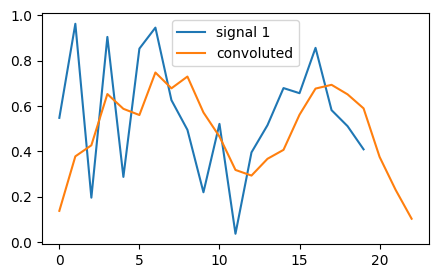

In [7]:
sine_signal1 = np.random.rand(20)
sine_signal2 = np.array([0.25, 0.25, 0.25, 0.25])
new_sine_signal = np.convolve(sine_signal1, sine_signal2)

fig = plt.figure(figsize=(5, 3))

ax = fig.add_subplot(1, 1, 1)
ax.plot(sine_signal1, label = "signal 1")
# ax.plot(sine_signal2, label = "signal 2")
ax.plot(new_sine_signal, label='convoluted')

plt.legend()
plt.show()

### Moving Average Smoothing

In [8]:
signal_line = np.random.randn(100)

In [9]:
window = 5
smoothing_signal = np.ones(window) / float(window)

In [10]:
new_signal_line = np.convolve(signal_line,smoothing_signal,mode='same')

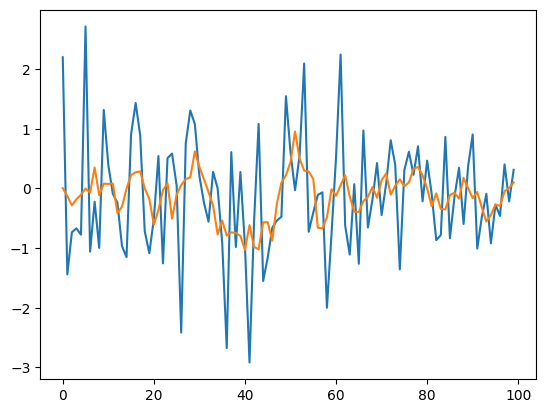

In [11]:
plt.plot(signal_line)
plt.plot(new_signal_line)

## Matrix Convolution
```
| 255 255 255 |    |  1  -1   1 |   | (255 x 1)+(255 x -1)+(255 x 1) +  |
| 255 100 255 |  x | -1   0  -1 | = | (255 x -1)+(100 x 0)+(255 x -1) + |  = -155 
| 100 100 100 |    |  1  -1   1 |   | (100 x1 )+(100 x -1)+(100 x 1)    |
```
Elementwise product and sum


In [12]:
a =np.array([
    [255, 255, 255],
    [255, 100, 255],
    [100, 100, 100]
])
b = np.array([
    [1, -1, 1],
    [-1, 0, -1],
    [1, -1, 1]
])

(a * b).sum()

-155

## Image Convolution

In [13]:
img = mpimg.imread("./images/rdj.jpg")
img.shape

(550, 550, 3)

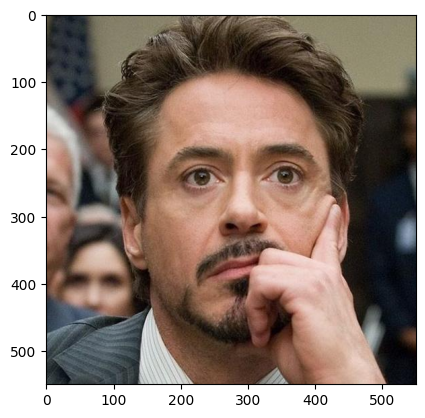

In [14]:
plt.imshow(img)

### Compress image

> array[::a,::a] --> every a index from rows and columns 

In [15]:
x = np.array([
    [1,2,3,4],
    [2,3,4,5],
    [5,67,7,7]
])
x[::3,::3]

array([[1, 4]])

### converting to float

In [16]:
a = img[::4,::4] / 255

In [17]:
a.shape

(138, 138, 3)

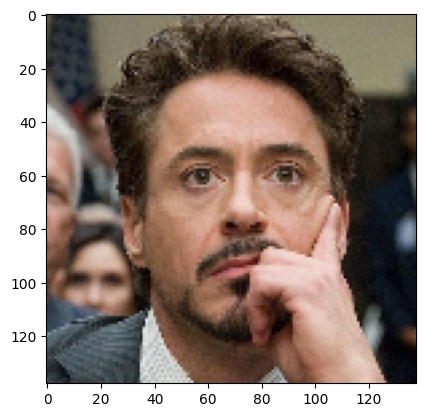

In [18]:
plt.imshow(a)

In [19]:
from scipy import signal

def apply_filter(mat, conv_filter): 
    mapped_1 = signal.convolve2d(mat[:,:,0],conv_filter,mode='same')
    mapped_2 = signal.convolve2d(mat[:,:,1],conv_filter,mode='same')
    mapped_3 = signal.convolve2d(mat[:,:,2],conv_filter,mode='same')
    new_mat = np.dstack((mapped_1,mapped_2,mapped_3))
    
    return new_mat

### Edge Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


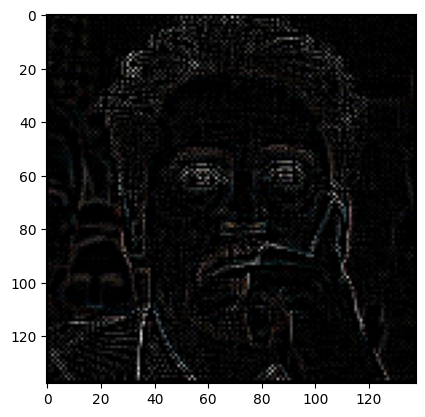

In [20]:
edge_filter_mat_1 = np.array([
    [1, -1, 1],
    [-1, 0, -1],
    [1, -1, 1]
])

plt.imshow(apply_filter(a, edge_filter_mat_1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


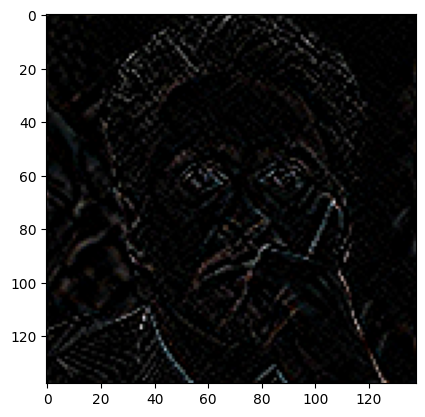

In [21]:
edge_filter_mat_2 = np.array([
    [1, 0, -1],
    [0, 0, 0],
    [-1, 0, 1]
])
plt.imshow(apply_filter(a,edge_filter_mat_2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


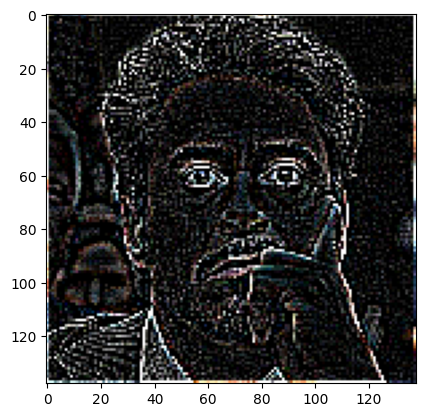

In [22]:
edge_filter_mat_3 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])
plt.imshow(apply_filter(a,edge_filter_mat_3))

### Sharpen

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


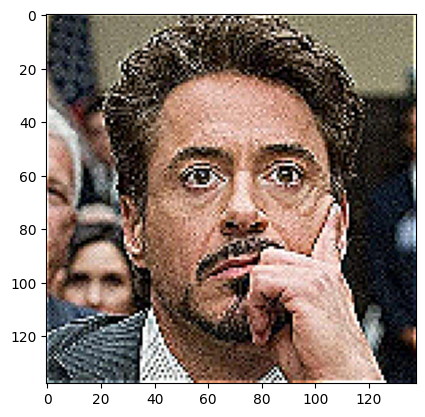

In [23]:
sharpen_filter_mat = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])
plt.imshow(apply_filter(a,sharpen_filter_mat))

### Box Blur 

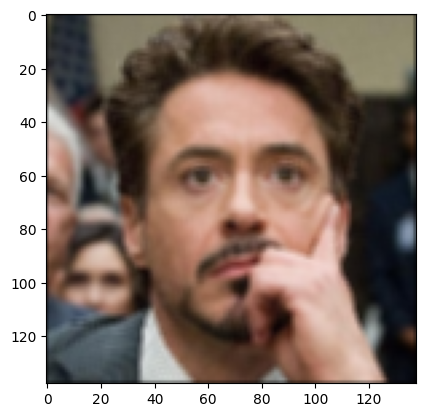

In [24]:
box_blur_filter_mat = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]) * 1/9
plt.imshow(apply_filter(a,box_blur_filter_mat))

### Gaussian Blur 3X3

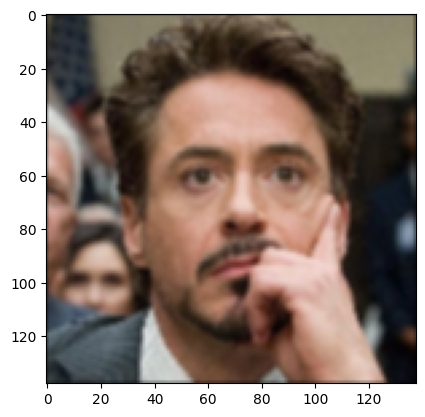

In [25]:
gaus_blur_filter_mat = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) * 1/16
plt.imshow(apply_filter(a,gaus_blur_filter_mat))

### Gaussian Blue 5X5

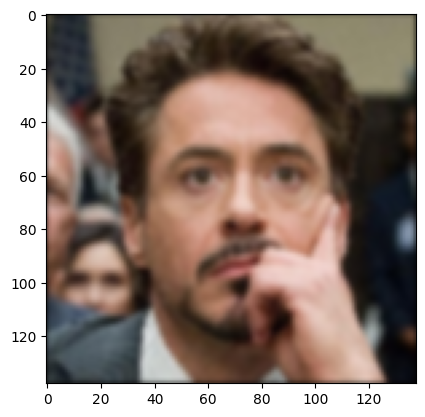

In [26]:
gaus_blur_5x5_filter_mat = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * 1/256
plt.imshow(apply_filter(a,gaus_blur_5x5_filter_mat))

### Brighten

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


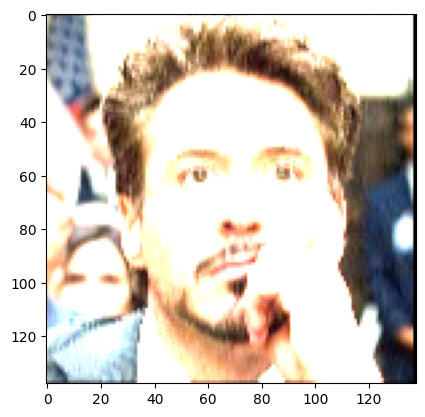

In [27]:
bright_filter_mat = np.array([
    [1, 0, 0], 
    [1, 0, 0],
    [1, 0, 0]
])
plt.imshow(apply_filter(a,bright_filter_mat))

### Custom Function

In [28]:
def custom_conv2D(matrix, kernel):
    
    k_r, k_c = kernel.shape
    f_r, f_c = matrix.shape
    
    max_rows = f_r - k_r + 1
    max_cols = f_c - k_c + 1
    
    new_frame = []
    
    for r in range(max_rows):
        new_row = []
        for c in range(max_cols):
            res = matrix[r : r+k_r, c : c+k_c ] * kernel
            new_row.append(res.sum())
        new_frame.append(new_row)
    new_mat = np.array(new_frame)
    
    return new_mat

def custom_image_conv(img, kernel):
    
    if len(img.shape) == 3:
        
        layers = img.shape[2]
        layer_mat = []
        
        for i in range(layers):
            mapped = custom_conv2D(matrix=img[:,:,i], kernel=kernel)
            layer_mat.append(mapped)

        new_mat = np.dstack(tuple(layer_mat))
        
    elif len(img.shape) == 2:
        new_mat = custom_conv2D(matrix=img, kernel=kernel)
    else:
        raise ValueError("shape is 1-D")
        
    return new_mat

### Vertical Edge

In [29]:
vertical_kernel = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

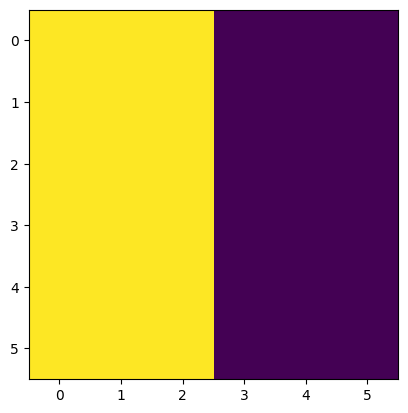

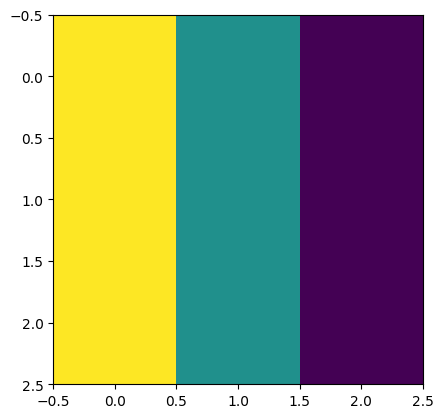

[[ 0 30 30  0]
 [ 0 30 30  0]
 [ 0 30 30  0]
 [ 0 30 30  0]]


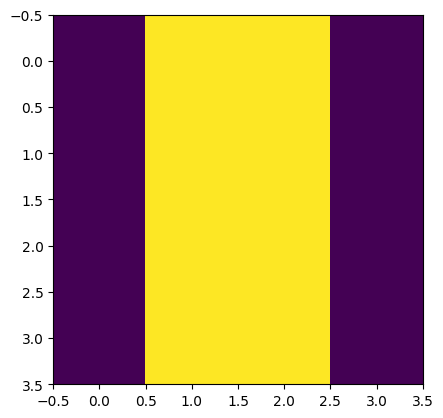

In [30]:
feature_mat = np.array([
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0] 
])


plt.imshow(feature_mat)
plt.show()

plt.imshow(vertical_kernel)
plt.show()


new_mat = custom_conv2D(matrix=feature_mat, kernel=vertical_kernel)

print(new_mat)
plt.imshow(new_mat)
plt.show()

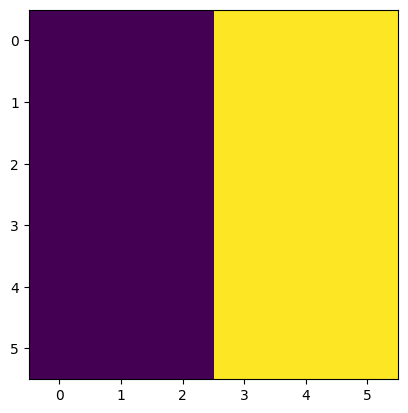

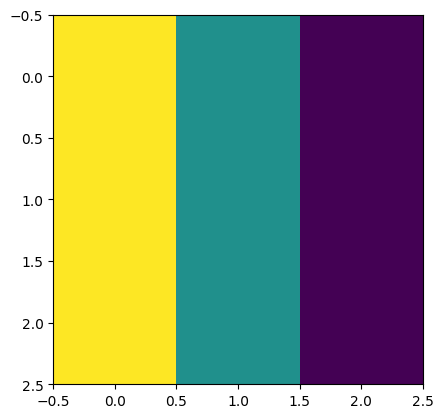

[[  0 -30 -30   0]
 [  0 -30 -30   0]
 [  0 -30 -30   0]
 [  0 -30 -30   0]]


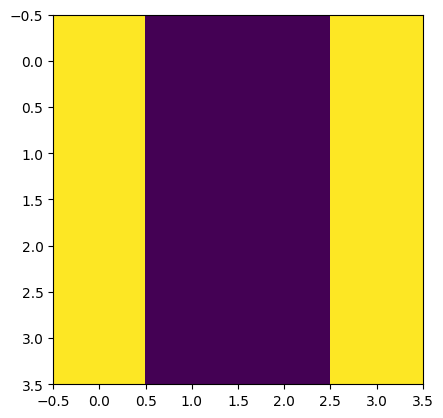

In [31]:
feature_mat = np.array([
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10]
])


plt.imshow(feature_mat)
plt.show()

plt.imshow(vertical_kernel)
plt.show()

new_mat = custom_conv2D(matrix=feature_mat, kernel=vertical_kernel)

print(new_mat)
plt.imshow(new_mat)
plt.show()

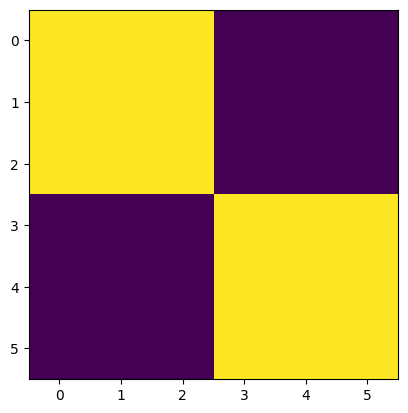

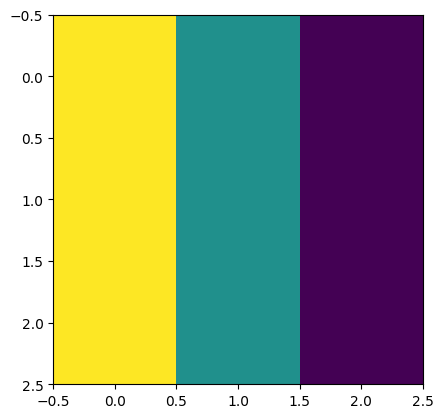

[[  0  30  30   0]
 [  0  10  10   0]
 [  0 -10 -10   0]
 [  0 -30 -30   0]]


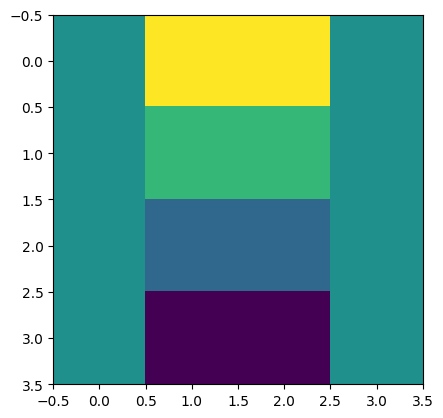

In [32]:
feature_mat = np.array([
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10],
    [0, 0, 0, 10, 10, 10]
])


plt.imshow(feature_mat)
plt.show()

plt.imshow(vertical_kernel)
plt.show()

new_mat = custom_conv2D(matrix=feature_mat, kernel=vertical_kernel)

print(new_mat)
plt.imshow(new_mat)
plt.show()

(550, 550, 3)


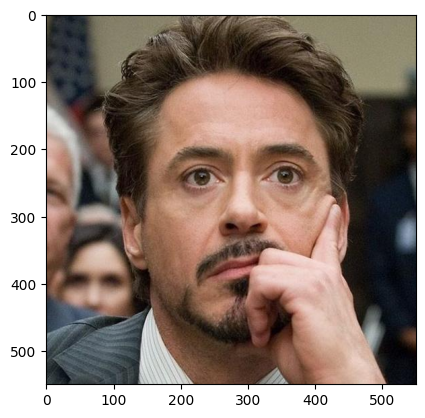

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


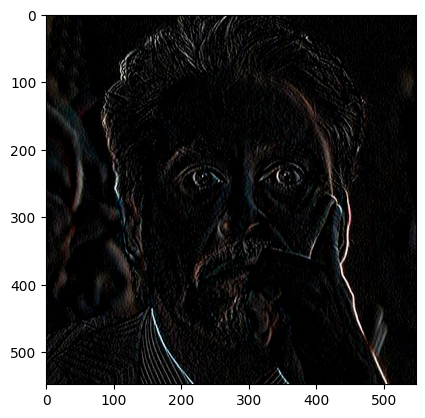

In [33]:
img = mpimg.imread("./images/rdj.jpg")

print(img.shape)
plt.imshow(img)
plt.show()

new_mat = custom_image_conv(img, vertical_kernel)
plt.imshow(new_mat)
plt.show()

(550, 550, 3)


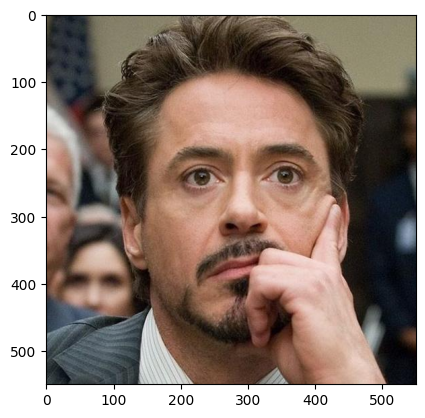

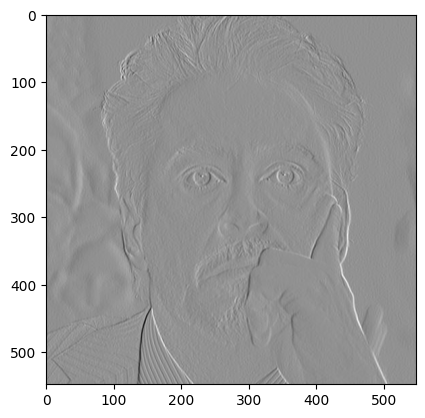

In [34]:
img = mpimg.imread("./images/rdj.jpg")

print(img.shape)
plt.imshow(img)
plt.show()

new_mat = np.sum(custom_image_conv(img, vertical_kernel),axis=2)
plt.imshow(new_mat,cmap='gray')
plt.show()

### Horizontal Edge

In [35]:
horizontal_kernel = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])


(550, 550, 3)


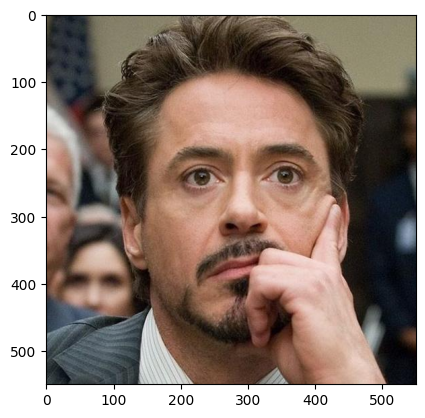

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


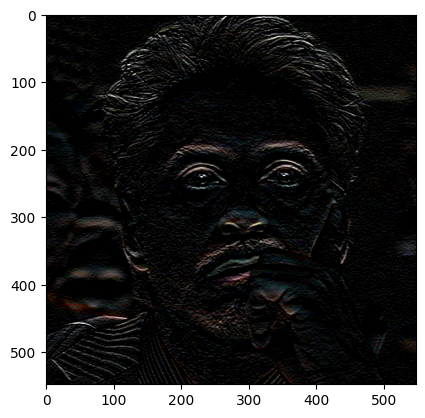

In [36]:
img = mpimg.imread("./images/rdj.jpg")

print(img.shape)

plt.imshow(img)
plt.show()

new_mat = custom_image_conv(img=img, kernel=horizontal_kernel)
plt.imshow(new_mat)
plt.show()

### Sobel Operator

In [37]:
sobel_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

(550, 550, 3)


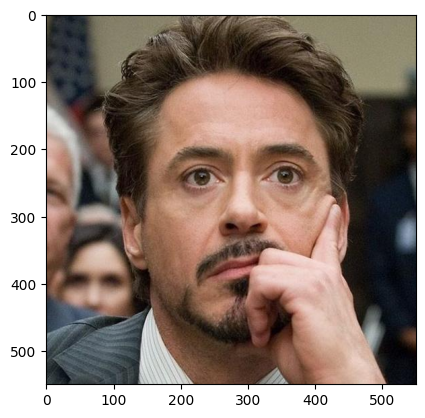

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


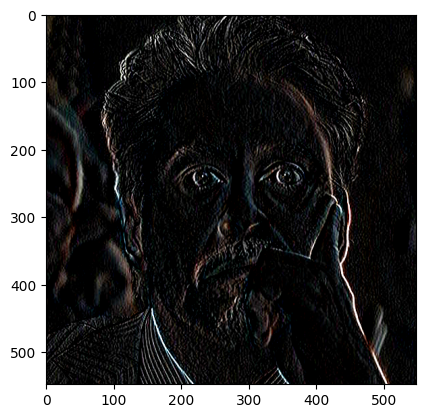

In [38]:
img = mpimg.imread("./images/rdj.jpg")

print(img.shape)

plt.imshow(img)
plt.show()

new_mat = custom_image_conv(img, sobel_filter)
plt.imshow(new_mat)
plt.show()

### Scharr Operator

In [39]:
scharr_filter = np.array([
    [3, 0, -3],
    [10, 0, -10],
    [3, 0, -3]
])


(550, 550, 3)


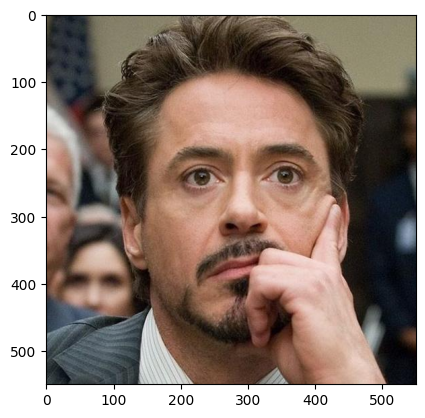

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


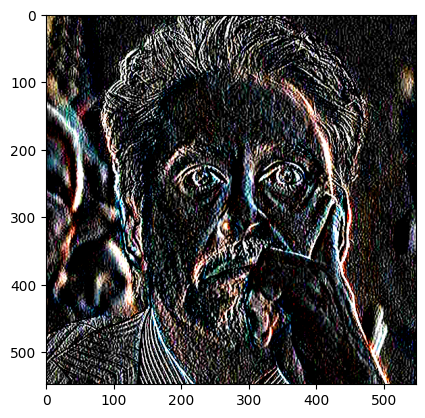

In [40]:
img = mpimg.imread("./images/rdj.jpg")

print(img.shape)


plt.imshow(img)
plt.show()

new_mat = custom_image_conv(img, scharr_filter)
plt.imshow(new_mat)
plt.show()

(550, 550, 3)


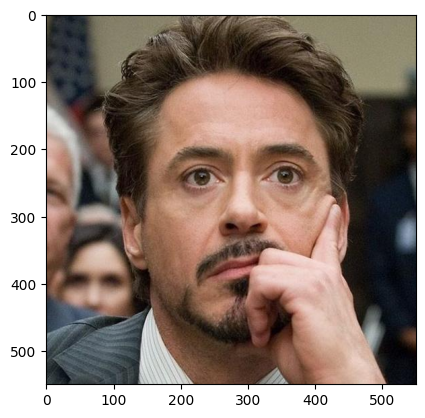

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
img = mpimg.imread("./images/rdj.jpg")

print(img.shape)

plt.imshow(img)
plt.show()

new_mat = custom_image_conv(img, scharr_filter.T)
plt.imshow(new_mat)
plt.show()